In [1]:
from selenium import webdriver

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
browser = webdriver.Chrome("chromedriver.exe")

In [38]:
url = browser.get('https://m.dailyhunt.in/news/india/english')

In [46]:
parents = browser.find_elements_by_css_selector('li.lang_en')
len(parents)

709

In [47]:
df = pd.DataFrame()
for job in parents:
    try:
        News_Type = job.find_element_by_css_selector('span').text
        News_Title = job.find_element_by_css_selector('h2').text
        News_URL = job.find_element_by_css_selector('a').get_attribute('href')
        News_Description = job.find_element_by_css_selector('p').text
    except:
        News_Type = None
        News_Title = None
        News_URL = None
        News_Description = None
        
    dic = {'News_Type' : News_Type,
          'News_Title' : News_Title,
          'News_URL' : News_URL,
          'News_Description' : News_Description}
            
    df = df.append(dic , ignore_index = True)
    #print(News_Title)
df

,News_Description,News_Title,News_Type,News_URL
0,"Seoul, Aug 22 (IANS) Seoul on Thursday said ne...","US, North Korea talks will soon resume: Seoul",HOME,https://m.dailyhunt.in/news/india/english/the+...
1,After receiving several requests from the indu...,RBI allows users to set up 'recurring transact...,YOUR STORY,https://m.dailyhunt.in/news/india/english/your...
2,New Delhi: After his arrest in a corruption ca...,Chidambaram Spends Night at CBI HQ he Attended...,HOME,https://m.dailyhunt.in/news/india/english/indi...
3,setTimeout(function(){(function(id){var embedT...,Why the Long Internet Shutdown in J&K Is Doing...,HOME,https://m.dailyhunt.in/news/india/english/the+...
4,,'No Point in Talking to India': Pak PM Imran Khan,HOME,https://m.dailyhunt.in/news/india/english/-epa...
5,,,,https://m.dailyhunt.in/news/india/english/catc...
6,Ajay Kumar Bhalla appointed as new Union Home ...,Ajay Kumar Bhalla appointed as new Union Home ...,HOME,https://m.dailyhunt.in/news/india/english/catc...
7,"No, seriously. Apple has jotted down a few do'...",Apple Issues Cleaning Instructions To People U...,HOME,https://m.dailyhunt.in/news/india/english/the+...
8,Bihar Police recruitment 2019: The Bihar Polic...,Bihar Police recruitment 2019: Applications in...,INDIA,https://m.dailyhunt.in/news/india/english/the+...
9,Political Activist Shehla Rashid New Delhi: Af...,"Let Army check authenticity of my remarks, wil...",TOP NEWS,https://m.dailyhunt.in/news/india/english/the+...


In [48]:
df.to_csv('df.csv')

## Sentiment Analysis

In [52]:
import string
import nltk
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from matplotlib import pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [53]:
# Lets take the News_Description column from the data
text = df[["News_Description"]]
print(text['News_Description'][0])

Seoul, Aug 22 (IANS) Seoul on Thursday said negotiations between North Korea and the US may resume soon, following a US special envoy's visit to South Korea."The impression that I got (from the...


In [54]:
# Step 1 : Convert every thing into lower case

text['Clean_text'] = text['News_Description'].str.replace('[^a-zA-Z ]', '')
print(text['Clean_text'][0])

Seoul Aug  IANS Seoul on Thursday said negotiations between North Korea and the US may resume soon following a US special envoys visit to South KoreaThe impression that I got from the


C:\Users\anura\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
senti = SentimentIntensityAnalyzer()

In [56]:
# Creating a function

text_polar = lambda x: senti.polarity_scores(x)['compound']

In [59]:
text['Polarity_score'] = text['Clean_text'].apply(text_polar)

text.head()

C:\Users\anura\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,News_Description,Clean_text,Polarity_score
0,"Seoul, Aug 22 (IANS) Seoul on Thursday said ne...",Seoul Aug IANS Seoul on Thursday said negotia...,0.5574
1,After receiving several requests from the indu...,After receiving several requests from the indu...,0.0000
2,New Delhi: After his arrest in a corruption ca...,New Delhi After his arrest in a corruption cas...,-0.3400
3,setTimeout(function(){(function(id){var embedT...,setTimeoutfunctionfunctionidvar embedTagdocume...,0.0000
4,,,0.0000


In [60]:
# Categorizing the polarity range
sentiment_mapping = {1 : "High Negative", 2 : "Moderate Negative", 3 : "Neutral", 4 : "Moderate Positive", 5 : "High Positive"}

map_sentiment = lambda val : np.digitize(val, [-1, -0.8, -0.25, 0.25, 0.8])

In [61]:
text['Sentiment_category'] = text['Polarity_score'].apply(map_sentiment)

# Labeling the sentiment category

text['Label'] = text['Sentiment_category'].map(sentiment_mapping)

text.head()

,News_Description,Clean_text,Polarity_score,Sentiment_category,Label
0,"Seoul, Aug 22 (IANS) Seoul on Thursday said ne...",Seoul Aug IANS Seoul on Thursday said negotia...,0.5574,4,Moderate Positive
1,After receiving several requests from the indu...,After receiving several requests from the indu...,0.0000,3,Neutral
2,New Delhi: After his arrest in a corruption ca...,New Delhi After his arrest in a corruption cas...,-0.3400,2,Moderate Negative
3,setTimeout(function(){(function(id){var embedT...,setTimeoutfunctionfunctionidvar embedTagdocume...,0.0000,3,Neutral
4,,,0.0000,3,Neutral


In [98]:
data = pd.DataFrame(text['Label'].value_counts())
data

,Label
Neutral,223
Moderate Positive,198
Moderate Negative,142
High Positive,75
High Negative,71


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

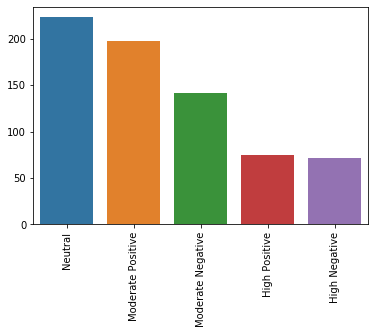

In [100]:
x=data.index
y=data['Label'].values
sns.barplot(x = x , y = y)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

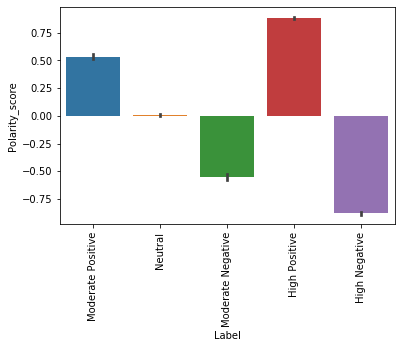

In [96]:
sns.barplot(x='Label' , y='Polarity_score' , data = text , orient = "v")
plt.xticks(rotation = 90)


In [62]:
# Creating the test and training data

X = text['News_Description']

Y = text['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size = 0.2 , random_state = 1234)


In [63]:
X_train.shape , Y_train.shape

((567,), (567,))

In [64]:
# Creatin a DTM 

vec = TfidfVectorizer()

X_train_vect =vec.fit_transform(X_train)

X_train_vect

<567x5656 sparse matrix of type '<class 'numpy.float64'>'
	with 23340 stored elements in Compressed Sparse Row format>

In [65]:
# Build a Model

from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

In [66]:
# Fitting the model on X_train_vect and Y_train

nb_model.fit(X_train_vect,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [67]:
X_test_vect = vec.transform(X_test)

X_test_vect

<142x5656 sparse matrix of type '<class 'numpy.float64'>'
	with 5259 stored elements in Compressed Sparse Row format>

In [68]:
Y_Pred = nb_model.predict(X_test_vect)

Y_Pred

array(['Moderate Positive', 'Moderate Positive', 'Moderate Positive',
       'Moderate Positive', 'Moderate Positive', 'Moderate Positive',
       'Moderate Negative', 'Moderate Positive', 'Moderate Positive',
       'Neutral', 'Moderate Negative', 'Moderate Negative', 'Neutral',
       'Moderate Positive', 'Moderate Positive', 'Neutral',
       'Moderate Positive', 'Moderate Negative', 'Neutral',
       'Moderate Positive', 'Moderate Positive', 'Moderate Positive',
       'Neutral', 'Moderate Positive', 'Moderate Negative',
       'Moderate Positive', 'Moderate Positive', 'Moderate Negative',
       'Moderate Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Moderate Positive', 'Neutral', 'Neutral', 'Moderate Positive',
       'Moderate Positive', 'Moderate Positive', 'Moderate Negative',
       'Moderate Positive', 'Neutral', 'Moderate Positive', 'Neutral',
       'Moderate Negative', 'Moderate Negative', 'Neutral',
       'Moderate Negative', 'Moderate Positive', 'Moder

In [69]:
Y_train.value_counts()

Neutral              181
Moderate Positive    158
Moderate Negative    110
High Positive         61
High Negative         57
Name: Label, dtype: int64

In [70]:
from sklearn.metrics import accuracy_score , confusion_matrix

accuracy_score(Y_test , Y_Pred)

0.4507042253521127

In [71]:
confusion_matrix(Y_test , Y_Pred)

array([[ 0,  0,  5,  6,  3],
       [ 0,  0,  1, 10,  3],
       [ 0,  0, 13, 13,  6],
       [ 0,  0,  3, 28,  9],
       [ 0,  0,  4, 15, 23]], dtype=int64)

In [72]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train_vect , Y_train)

C:\Users\anura\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
Y_pred1 = clf.predict(X_test_vect)

In [74]:
accuracy_score(Y_test , Y_pred1)

0.44366197183098594